<a href="https://colab.research.google.com/github/Ahnjihye/allinone_AI/blob/master/AIO_AI_day6_(%EC%99%84%EC%84%B1%EB%B3%B8)__MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt

# 그래프 폰트 설정  --> 런타임 다시 시작
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


# 손글씨 이미지 구성 - MNIST 
- 손글씨 이미지 0부터 9까지 총10개 
<img src="https://learnmachinelearning.files.wordpress.com/2017/08/mnist.png?w=638" height="150px">

- 각 숫자 이미지는 28 pixel * 28 pixel   

![대체 텍스트](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRiYU_Wf8GiLoaAXWiCdJHm87IWjpOfTClkwg&usqp=CAU)


- 손글씨 0~9 = 총 10개 * 각 600개 = 총 60000개
- 학습 데이터 60000개, 테스트 데이터 10000개로 구성

<img src = "https://korchris.github.io/images/overview_mnist.png">

## 1. 데이터 로드

In [2]:
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
print("학습셋 이미지 수 :", X_train.shape)
print("테스트셋 이미지 수:", X_test.shape)

학습셋 이미지 수 : (60000, 28, 28)
테스트셋 이미지 수: (10000, 28, 28)


In [4]:
# 첫번째 숫자 살펴보기
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
# 조금 더 예쁘게 출력해보자!
import sys

for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


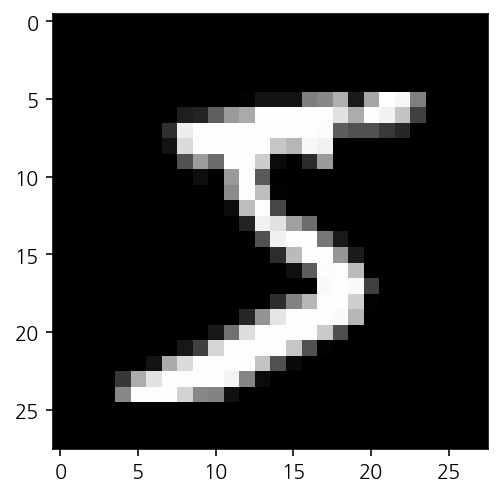

5


In [6]:
import matplotlib.pyplot as plt

# 이미지로 출력해보기  
plt.imshow(X_train[0], cmap='gray')
plt.show()
# 해당 결과값은 ? 
print(Y_train[0])

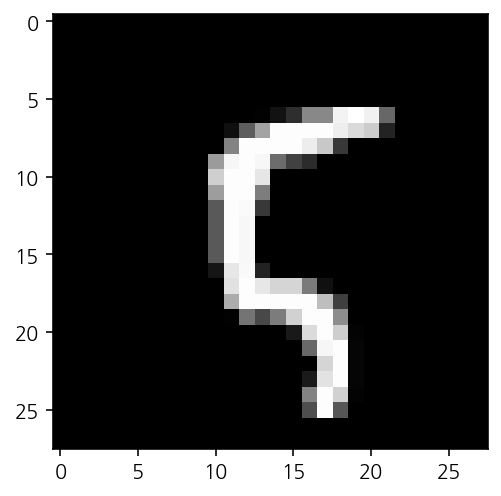

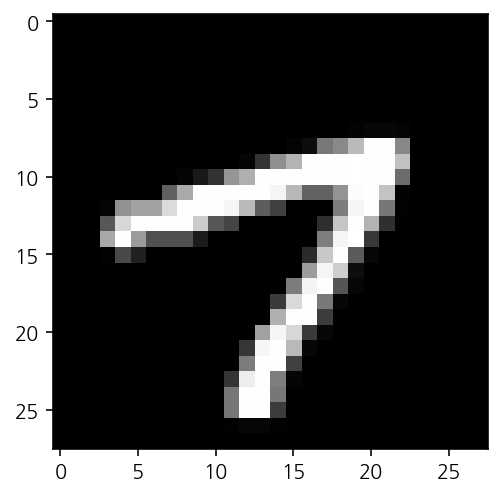

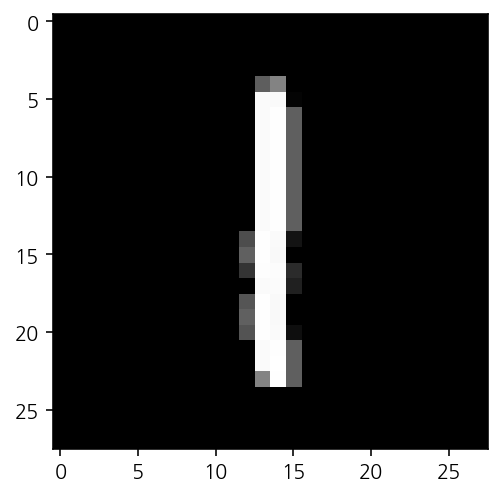

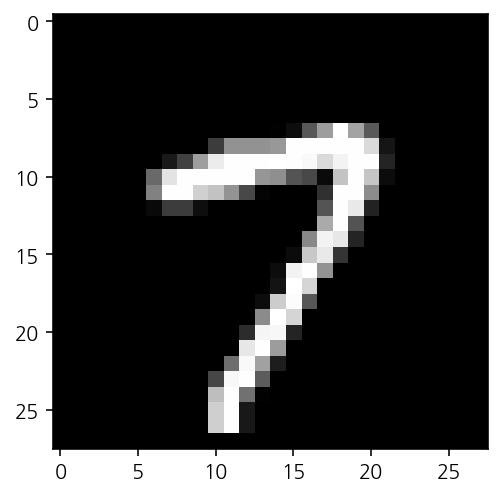

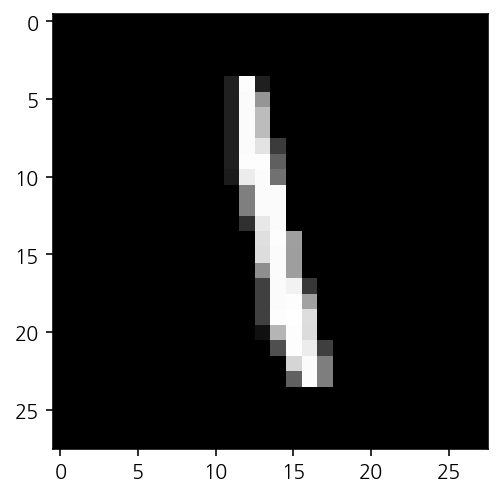

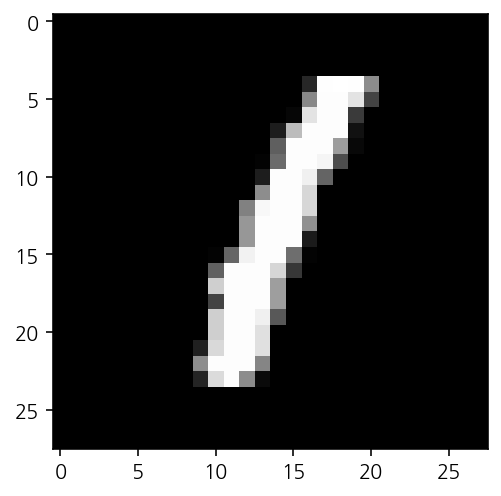

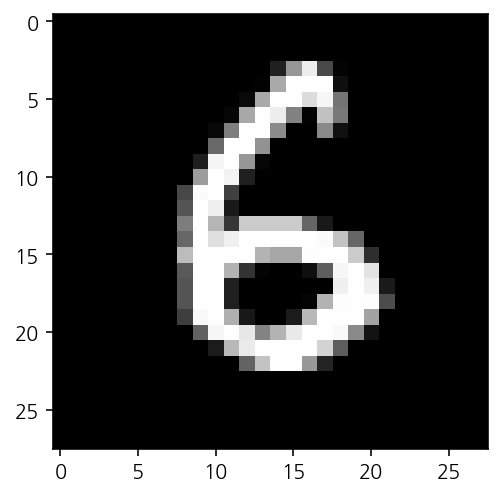

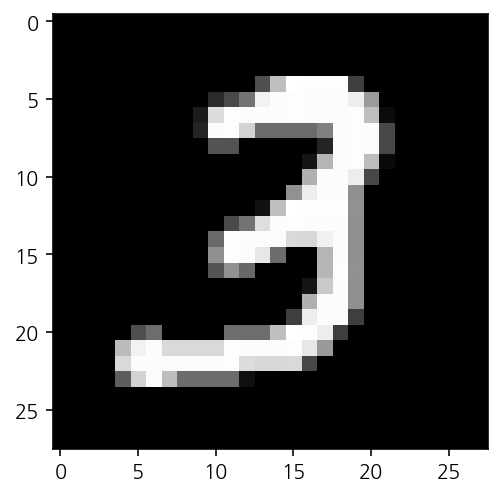

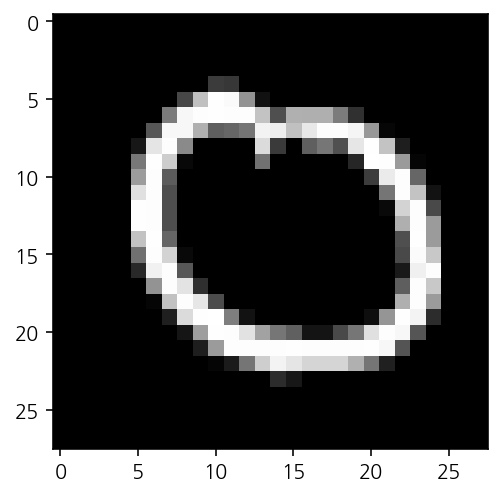

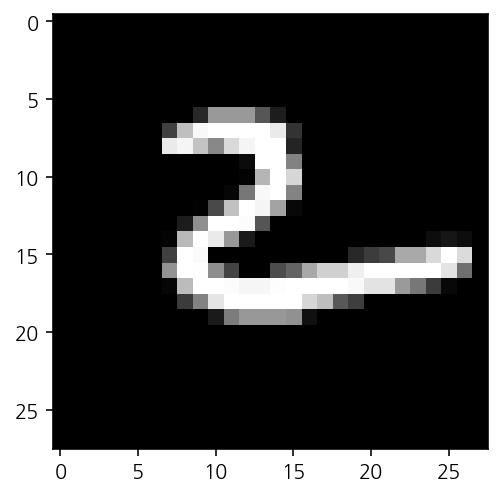

In [7]:
# 숫자 10개 출력
for i in range(100, 110) : 
    plt.imshow(X_train[i], cmap='gray')
    plt.show()

#### 데이터 주물러보기

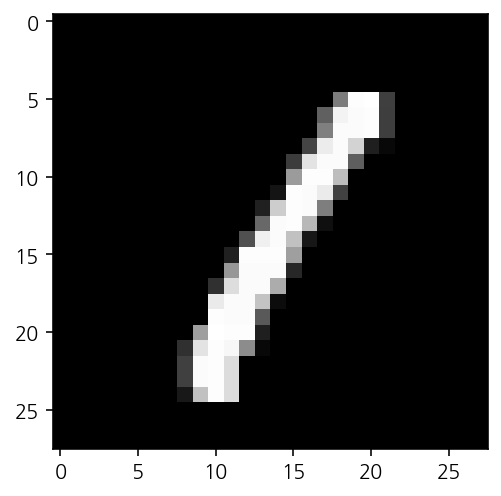

In [8]:
# 이미지 주무르기
number = X_train[3].copy()
plt.imshow(number, cmap='gray')

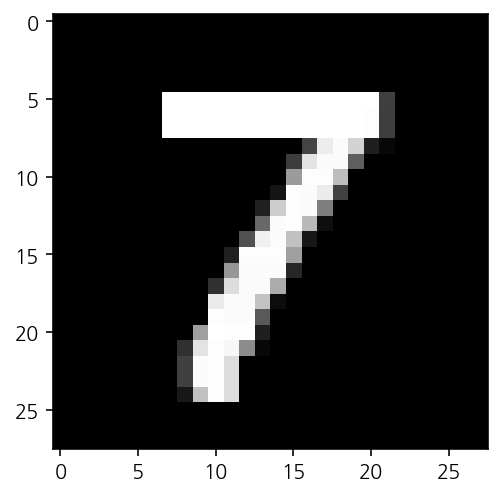

In [9]:
# 1을 7로 만들기
number[5:8, 7:20] = 255
plt.imshow(number, cmap='gray')

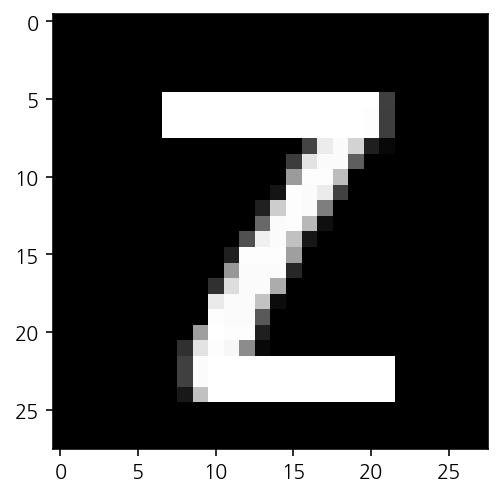

In [10]:
# 7을 2로 만들기
number[22:25, 10:22] = 255
plt.imshow(number, cmap='gray')

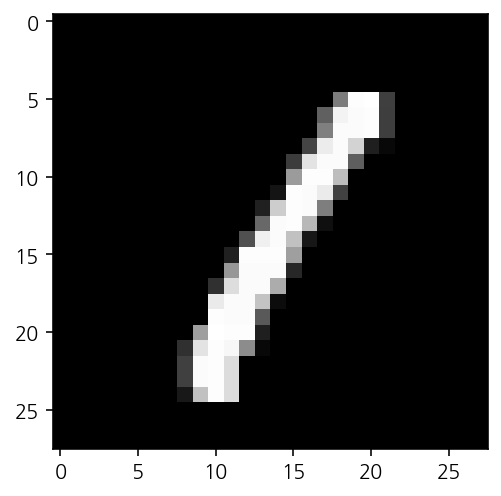

In [11]:
plt.imshow(X_train[3], cmap='gray')

## 2. 출력을 원 핫 인코딩 처리

In [12]:
print(Y_train[0])
print(Y_train[:10])

5
[5 0 4 1 9 2 1 3 1 4]


In [13]:
import tensorflow.keras.utils as utils

print('인코딩 전 학습/테스트 데이터', Y_train.shape, Y_test.shape)

# 학습데이터의 Y를 원 핫 인코딩 처리
Y_train = utils.to_categorical(Y_train, 10)

# 테스트 데이터의 Y를 원 핫 인코딩 처리
Y_test = utils.to_categorical(Y_test, 10)

print('인코딩 후 학습/테스트 데이터',Y_train.shape, Y_test.shape)

인코딩 전 학습/테스트 데이터 (60000,) (10000,)
인코딩 후 학습/테스트 데이터 (60000, 10) (10000, 10)


In [14]:
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 2. 딥러닝 모델 구성하기

## Q. 손글씨 딥러닝 모델의 입력층 개수는?
## Q. 출력층의 개수는?

<img src = 'https://github.com/Ahnjihye/allinone_AI/blob/images/34_mnist%20%EA%B5%AC%EC%A1%B0.png?raw=true' width =700>

### 2-1. model1 : 은닉층 없이 돌려보자

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# 층을 쌓을 수 있는 Sequential의 객체 생성
model1 = Sequential()

In [16]:
# 입력층에서 입력되는 이차원 리스트를 한 줄로 만들어주는 작업
# 28*28 --> 784
model1.add(Flatten())

In [17]:
# 모델에 층 추가
# 층은 Dense(노드개수, activation =활성화함수), 
# 입력층을 추가할 때만 input_dim 옵션
model1.add(Dense(10, input_dim = 784, activation='softmax'))

In [18]:
# 만든 딥러닝 구조를 컴파일
model1.compile(loss='categorical_crossentropy', 
                     optimizer='adam', 
                     metrics=['accuracy'])

In [19]:
# 딥러닝 구조에 데이터를 넣어 학습시키기
model1_result = model1.fit(X_train, Y_train, 
                           validation_data = (X_test, Y_test),
                           epochs=10, batch_size =200 , verbose=1)

Epoch 1/10
300/300 [==============================] - 1s 3ms/step - loss: 13.5360 - accuracy: 0.7964 - val_loss: 5.7018 - val_accuracy: 0.8782
Epoch 2/10
300/300 [==============================] - 1s 2ms/step - loss: 4.9987 - accuracy: 0.8785 - val_loss: 4.3884 - val_accuracy: 0.8873
Epoch 3/10
300/300 [==============================] - 1s 2ms/step - loss: 4.0335 - accuracy: 0.8821 - val_loss: 3.8053 - val_accuracy: 0.8914
Epoch 4/10
300/300 [==============================] - 1s 2ms/step - loss: 3.4083 - accuracy: 0.8894 - val_loss: 3.3814 - val_accuracy: 0.8855
Epoch 5/10
300/300 [==============================] - 1s 2ms/step - loss: 3.0589 - accuracy: 0.8883 - val_loss: 3.0631 - val_accuracy: 0.8957
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 2.8129 - accuracy: 0.8898 - val_loss: 3.4103 - val_accuracy: 0.8856
Epoch 7/10
300/300 [==============================] - 1s 2ms/step - loss: 2.5827 - accuracy: 0.8924 - val_loss: 2.8943 - val_accuracy: 0.8922
Epoch

In [20]:
def loss_graph(history):
  # 손실값 그래프 그리기
  plt.figure(figsize=[8,6])
  plt.plot(history.history['loss'],'r',linewidth=3.0)
  plt.plot(history.history['val_loss'],'b',linewidth=3.0)
  plt.legend(['학습데이터 오차', '테스트 데이터 오차'],fontsize=18)
  plt.xlabel('학습횟수 ',fontsize=16)
  plt.ylabel('오차',fontsize=16)
  plt.title('오차 그래프',fontsize=16)

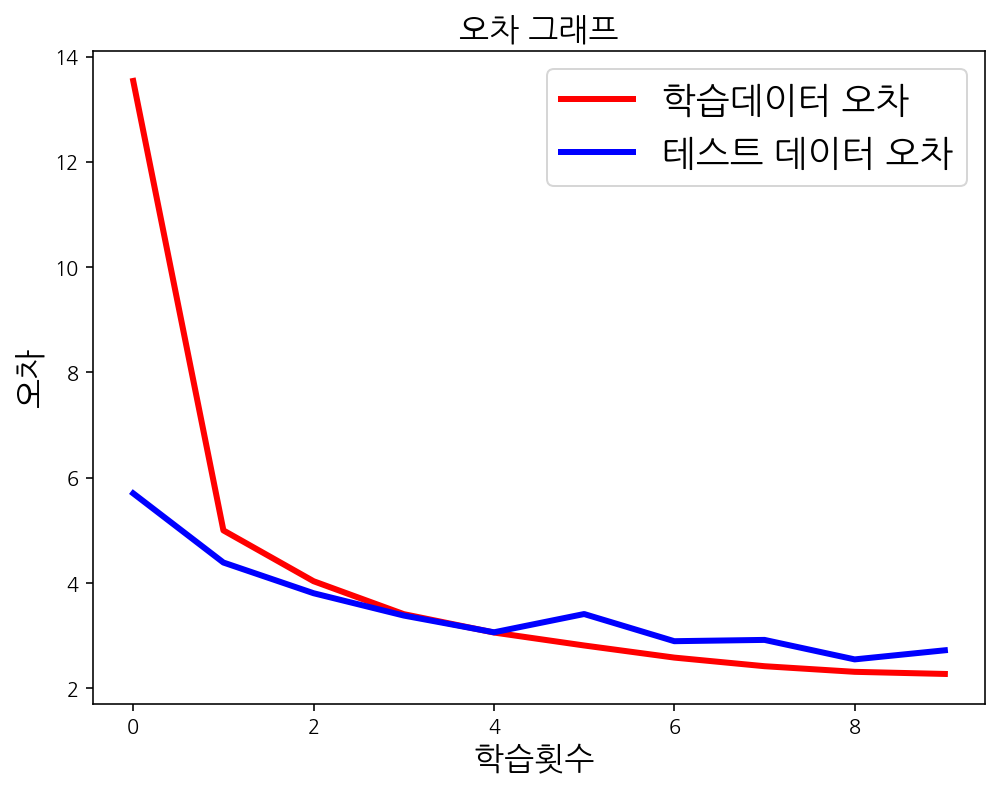

In [21]:
loss_graph(model1_result)

In [33]:
# 완성된 모델 평가하기
score1 = model1.evaluate(X_test, Y_test, verbose =1)

print(score1)      #[오차, 정확도]

313/313 [==============================] - 0s 1ms/step - loss: 2.7217 - accuracy: 0.8968
[2.721672773361206, 0.8967999815940857]


In [34]:
# 최종 점수
print(score1[1]*100)

89.67999815940857


### 2-2. model2 : 은닉층을 추가하여 돌려보자

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# 딥러닝 구조를 담을 수 있는 객체 생성하기
model2 = Sequential()

In [26]:
# 입력데이터 이차원 리스트를 한 줄로 flatten
model2.add(Flatten())

In [27]:
# 모델에 층 추가 : 입력층 784 --> 은닉층 512
model2.add(Dense(512, input_dim=784, activation = 'relu'))

In [28]:
# 모델에 층 추가 : 은닉층 512 -> 출력층 10
model2.add(Dense(10, activation='softmax'))

In [29]:
# 만든 딥러닝 구조를 컴파일
model2.compile(loss='categorical_crossentropy', 
                     optimizer='adam', 
                     metrics=['accuracy'])

In [30]:
# 작성한 딥러닝 구조에 데이터를 넣어 학습
model2_result = model2.fit(X_train, Y_train, 
                           validation_data =(X_test, Y_test),
                           epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 3s - loss: 5.2669 - accuracy: 0.9028 - val_loss: 1.3739 - val_accuracy: 0.9425
Epoch 2/10
300/300 - 3s - loss: 0.7921 - accuracy: 0.9569 - val_loss: 0.8381 - val_accuracy: 0.9498
Epoch 3/10
300/300 - 3s - loss: 0.3900 - accuracy: 0.9693 - val_loss: 0.7516 - val_accuracy: 0.9580
Epoch 4/10
300/300 - 3s - loss: 0.2710 - accuracy: 0.9751 - val_loss: 0.6595 - val_accuracy: 0.9598
Epoch 5/10
300/300 - 3s - loss: 0.1988 - accuracy: 0.9803 - val_loss: 0.6264 - val_accuracy: 0.9636
Epoch 6/10
300/300 - 3s - loss: 0.1544 - accuracy: 0.9835 - val_loss: 0.5379 - val_accuracy: 0.9650
Epoch 7/10
300/300 - 3s - loss: 0.1464 - accuracy: 0.9833 - val_loss: 0.5804 - val_accuracy: 0.9666
Epoch 8/10
300/300 - 3s - loss: 0.1293 - accuracy: 0.9851 - val_loss: 0.6049 - val_accuracy: 0.9650
Epoch 9/10
300/300 - 3s - loss: 0.1388 - accuracy: 0.9852 - val_loss: 0.5632 - val_accuracy: 0.9675
Epoch 10/10
300/300 - 3s - loss: 0.1372 - accuracy: 0.9847 - val_loss: 0.5778 - val_accuracy: 0.9641

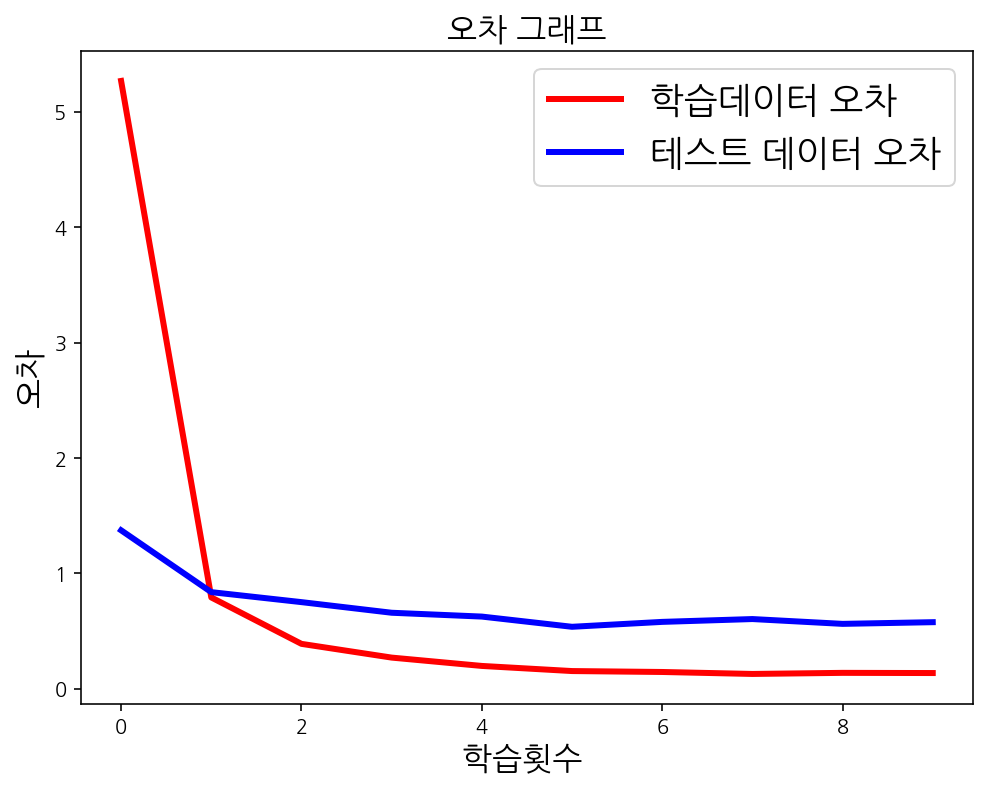

In [31]:
loss_graph(model2_result)

In [32]:
# 완성된 모델 평가하기
score2 = model2.evaluate(X_test, Y_test, verbose =1)

print(score2)      #[오차, 정확도]

313/313 [==============================] - 1s 2ms/step - loss: 0.5778 - accuracy: 0.9641
[0.5778025388717651, 0.9641000032424927]


In [35]:
# 최종 점수
print(score2[1]*100)

96.41000032424927


### 2-3. model3 : 입력데이터를 정규화하여 넣어보자

In [36]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

#### 정규화를 하는 이유 


<img src = 'https://www.agilent.com/cs/promotions/images/before-after-normalization.png' width=700>

[출처](https://www.agilent.com/en/products/cell-analysis/seahorse-xf-imaging-normalization-solution)

<img src='https://i1.wp.com/hleecaster.com/wp-content/uploads/2019/12/outlier.png?w=1280' width =700>


[참고 읽을거리](http://hleecaster.com/ml-normalization-concept/)

In [37]:
# 픽셀값 0 ~ 255 를 0 ~ 1 사이의 값으로 정규화
X_train = X_train / 255
X_test = X_test / 255

In [39]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# 딥러닝 층을 담을 수 있는 객체 생성
model3 = Sequential()

In [48]:
# 28*28을 한 줄로 만들어주는 작업
model3.add(Flatten())

In [49]:
# 모델에 층 추가 : 입력층 784 --> 은닉층 512
model3.add(Dense(512, input_dim = 784, activation='relu'))

In [50]:
# 모델에 층 추가 : 은닉층 512 --> 출력층 10
model3.add(Dense(10, activation='softmax'))

In [51]:
# 작성한 모델 컴파일
model3.compile(loss='categorical_crossentropy', 
                     optimizer='adam', 
                     metrics=['accuracy'])

In [52]:
# 작성한 모델에 학습데이터를 넣어 학습 
# 현재  X_train에는 정규화 처리된 데이터가 저장되어 있음
model3_result = model3.fit(X_train, Y_train, 
                           validation_data =(X_test, Y_test),
                           epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 3s - loss: 0.3032 - accuracy: 0.9144 - val_loss: 0.1499 - val_accuracy: 0.9544
Epoch 2/10
300/300 - 3s - loss: 0.1246 - accuracy: 0.9640 - val_loss: 0.1045 - val_accuracy: 0.9687
Epoch 3/10
300/300 - 3s - loss: 0.0823 - accuracy: 0.9765 - val_loss: 0.0845 - val_accuracy: 0.9743
Epoch 4/10
300/300 - 3s - loss: 0.0599 - accuracy: 0.9830 - val_loss: 0.0732 - val_accuracy: 0.9760
Epoch 5/10
300/300 - 3s - loss: 0.0449 - accuracy: 0.9873 - val_loss: 0.0676 - val_accuracy: 0.9785
Epoch 6/10
300/300 - 3s - loss: 0.0350 - accuracy: 0.9905 - val_loss: 0.0637 - val_accuracy: 0.9791
Epoch 7/10
300/300 - 3s - loss: 0.0270 - accuracy: 0.9929 - val_loss: 0.0630 - val_accuracy: 0.9798
Epoch 8/10
300/300 - 3s - loss: 0.0209 - accuracy: 0.9948 - val_loss: 0.0579 - val_accuracy: 0.9814
Epoch 9/10
300/300 - 3s - loss: 0.0155 - accuracy: 0.9964 - val_loss: 0.0606 - val_accuracy: 0.9818
Epoch 10/10
300/300 - 3s - loss: 0.0122 - accuracy: 0.9977 - val_loss: 0.0578 - val_accuracy: 0.9819

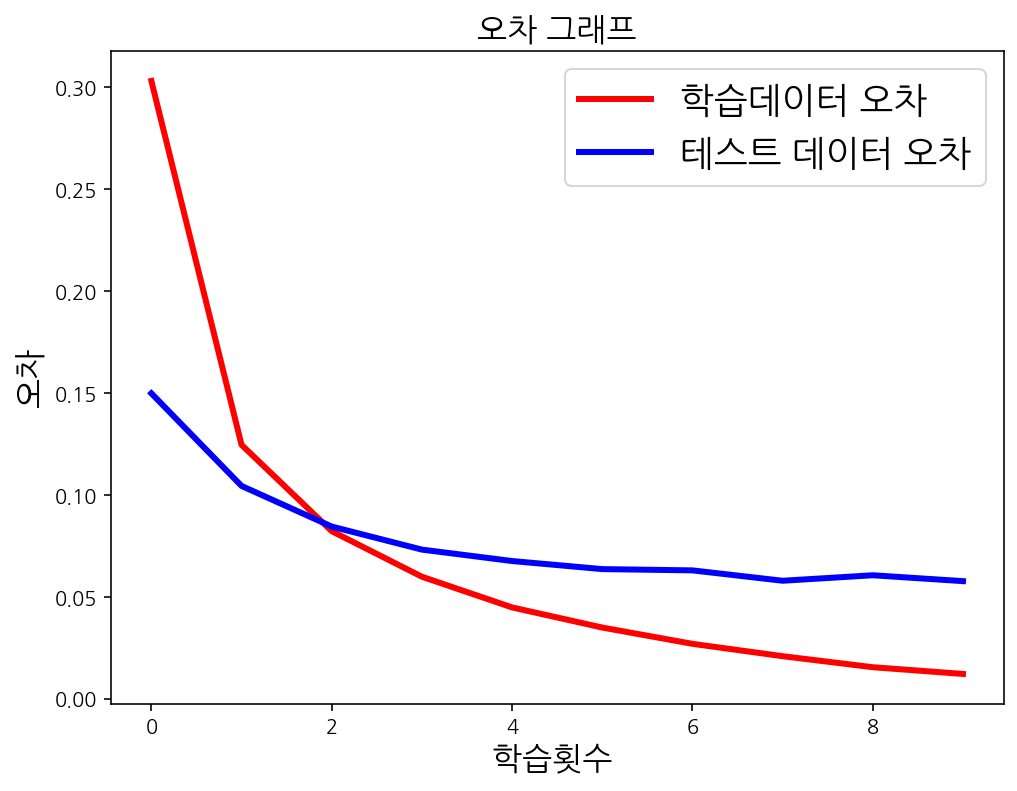

In [53]:
loss_graph(model3_result)

In [54]:
# 완성된 모델 평가하기
score3 = model3.evaluate(X_test, Y_test, verbose =1)

print(score3)      #[오차, 정확도]

313/313 [==============================] - 1s 2ms/step - loss: 0.0578 - accuracy: 0.9819
[0.05775618180632591, 0.9818999767303467]


In [55]:
# 최종 점수
print(score3[1]*100)

98.18999767303467


## 내 손글씨를 인식할 수 있을까?
그림판 <그림>

In [116]:
from google.colab import files
uploaded = files.upload()

Saving 4.png to 4 (2).png


In [ ]:
s = image.load_img(f_name, target_size=(28, 28), color_mode="grayscale")
img = image.img_to_array(s).astype('float32')
print(np.argmax(model3.predict(img.reshape(-1, 28, 28, 1))))

In [117]:
# 그림 파일 로드 및 사이즈 변경
s = image.load_img('4 (2).png', target_size=(28, 28), color_mode="grayscale")
s

In [118]:
# 이미지를 넘파이로 바꾸기
img = image.img_to_array(s).astype('float32')

# 모델에 넣고 결과 확인해보기
print(np.argmax(model3.predict(img.reshape(-1, 28, 28, 1))))

4


In [119]:
from google.colab import files
uploaded = files.upload()

Saving 0.png to 0 (1).png
Saving 1.png to 1 (3).png
Saving 2.png to 2 (2).png
Saving 3.png to 3 (2).png
Saving 4.png to 4 (3).png
Saving 5.png to 5 (2).png
Saving 6.png to 6 (2).png
Saving 7.png to 7 (2).png
Saving 8.png to 8 (4).png
Saving 9.png to 9 (2).png


In [120]:
# samples 변수에 손글씨 파일명 입력하기
samples = ['1.png', '2.png', '3.png', '4.png', '5.png',
           '6.png', '7.png', '8.png', '9.png', '0.png']

# 내 손글씨 예측하기
for f_name in samples:
  s = image.load_img(f_name, target_size=(28, 28), color_mode="grayscale")
  img = image.img_to_array(s).astype('float32')
  print(np.argmax(model3.predict(img.reshape(-1, 28, 28, 1))))

1
2
3
4
5
6
7
8
8
0
